In [1]:
from importing_sb import *
from pitch_plotting import *
import numpy as np
import pandas as pd

data_dir = '/Users/jm533/Documents/GitHub/football_analytics/open-data/data/'

comp_data = open_data(data_dir + 'competitions.json')
la_liga_seasons = [i['season_id'] for i in comp_data if i['competition_id'] == 11]
match_data = [sorted(open_data(data_dir + 'matches/11/{}.json'.format(i)), key = lambda k:k['match_date']) for i in la_liga_seasons]
#event_data = [[open_data(data_dir + 'events/{}.json'.format(j['match_id'])) for j in i] for i in match_data]
#match_data = [pd.DataFrame(open_data(data_dir + 'matches/11/{}.json'.format(i))).sort_values('match_week',ascending=True) for i in la_liga_seasons]
#event_data = [[pd.DataFrame(open_data(data_dir + 'events/{}.json'.format(j))) for j in i['match_id']] for i in match_data]


comp_df = pd.DataFrame(comp_data)
#match_df = pd.DataFrame(match_data)

In [2]:
years = list(range(2015,2003,-1))
match_id = {}
for i in range(len(years)):
    df = pd.DataFrame(match_data[i])
    match_id[str(years[i])] = df['match_id'].values

In [3]:
event_data = {}
for year in years:
    event_data[str(year)] = []
    for match in match_id[str(year)]:
        event_data[str(year)].append(open_data(data_dir + 'events/{}.json'.format(str(match))))

In [4]:
event_data_15 = [i for match in event_data['2015'] for i in match]

In [5]:
messi = 'Lionel Andrés Messi Cuccittini'

In [6]:
# Calculate amount of 90s played per season
m_90_played = []
for year in years:
    tot = 0
    for i in range(len(event_data[str(year)])):
        tot += get_player_info(event_data[str(year)][i],messi).sec_played
        
    m_90_played.append((tot / 60) / 90)

In [13]:
m_90_played

[31.193703703703704,
 38.763888888888886,
 28.72759259259259,
 30.458333333333332,
 37.52240740740741,
 32.82055555555556,
 32.55166666666667,
 28.943333333333335,
 22.907777777777774,
 22.799074074074074,
 10.357037037037037,
 1.0203703703703704]

## Shots

In [6]:
shots = {}
for year in years:
    shots[str(year)] = [get_shots(match) for match in event_data[str(year)]]

In [7]:
shots_seas = {}
for year in shots:
    shots_seas[str(year)] = pd.concat(shots[str(year)])
    shots_seas[str(year)].reset_index(inplace=True)

In [8]:
m_shots_seas = {}
for year in years:
    m_shots_seas[str(year)] = shots_seas[str(year)][shots_seas[str(year)]['player'] == messi]

In [30]:
m_h = np.array([len(m_shots_seas[str(i)][m_shots_seas[str(i)]['body_part'] == 'Head']) for i in years])
m_h_g = np.array([len(m_shots_seas[str(i)][(m_shots_seas[str(i)]['body_part'] == 'Head')&(m_shots_seas[str(i)]['outcome'] == 'Goal')]) for i in years])
m_lf = np.array([len(m_shots_seas[str(i)][(m_shots_seas[str(i)]['body_part'] == 'Left Foot')]) for i in years])
m_lf_g = np.array([len(m_shots_seas[str(i)][(m_shots_seas[str(i)]['body_part'] == 'Left Foot')&(m_shots_seas[str(i)]['outcome'] == 'Goal')]) for i in years])
m_rf = np.array([len(m_shots_seas[str(i)][(m_shots_seas[str(i)]['body_part'] == 'Right Foot')]) for i in years])
m_rf_g = np.array([len(m_shots_seas[str(i)][(m_shots_seas[str(i)]['body_part'] == 'Right Foot')&(m_shots_seas[str(i)]['outcome'] == 'Goal')]) for i in years])

h = np.array([len(shots_seas[str(i)][shots_seas[str(i)]['body_part'] == 'Head']) for i in years])
h_g = np.array([len(shots_seas[str(i)][(shots_seas[str(i)]['body_part'] == 'Head')&(shots_seas[str(i)]['outcome'] == 'Goal')]) for i in years])
lf = np.array([len(shots_seas[str(i)][(shots_seas[str(i)]['body_part'] == 'Left Foot')]) for i in years])
lf_g = np.array([len(shots_seas[str(i)][(shots_seas[str(i)]['body_part'] == 'Left Foot')&(shots_seas[str(i)]['outcome'] == 'Goal')]) for i in years])
rf = np.array([len(shots_seas[str(i)][(shots_seas[str(i)]['body_part'] == 'Right Foot')]) for i in years])
rf_g = np.array([len(shots_seas[str(i)][(shots_seas[str(i)]['body_part'] == 'Right Foot')&(shots_seas[str(i)]['outcome'] == 'Goal')]) for i in years])

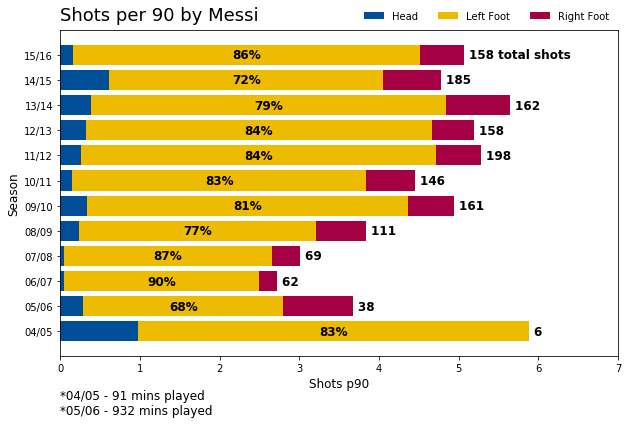

In [112]:
ind = list(reversed(np.arange(len(years))))
seasons = ['15/16','14/15','13/14','12/13','11/12','10/11','09/10','08/09','07/08','06/07','05/06','04/05']

fig, ax = plt.subplots(figsize=(10,6))
p1 = ax.barh(ind, m_h / m_90_played,color='#004d98')
p2 = ax.barh(ind, m_lf / m_90_played,left=m_h / m_90_played,color='#edbb00')
p3 = ax.barh(ind, m_rf / m_90_played,left=(m_lf+m_h) / m_90_played,color='#a50044')

#labels = ax.get_xticklabels()
ax.set_yticks(ind)
ax.set_yticklabels(seasons)
ax.set_xlabel('Shots p90',fontsize=12)
ax.set_ylabel('Season',fontsize=12)
ax.set_xlim(0,7)
#ax.set_title('Shots per 90 by Messi')

ax.text(0.0,1.03,'Shots per 90 by Messi',transform=ax.transAxes,fontsize=18)
ax.legend((p1[0], p2[0], p3[0]), ('Head', 'Left Foot', 'Right Foot'),ncol=3,loc=4,bbox_to_anchor=(1.0,1.0),frameon=False)

tshotslabels = ['total shots']
for i in range(len(seasons)-1):
    tshotslabels.append('')

for i in range(len(ind)):
    ax.annotate('{0} {1}'.format((m_h + m_lf + m_rf)[i],tshotslabels[i]),
                    xy=(((m_h + m_lf + m_rf)[i] / m_90_played[i]), ind[i]), xytext=(5,0),
                    textcoords="offset points",
                    ha='left', va='center', fontsize=12, fontweight='bold')
    
ax.text(0.0, -0.1, '*04/05 - 91 mins played\n*05/06 - 932 mins played', ha='left', va='top', transform=ax.transAxes, fontsize=12)

for i in range(len(ind)):
    ax.annotate('{:.0f}%'.format((m_lf[i]/sum([m_h[i],m_lf[i],m_rf[i]])) * 100),
                    xy=(((m_lf[i] / 2) + m_h[i]) / m_90_played[i], ind[i]), xytext=(0,0),
                    textcoords="offset points",
                    ha='center', va='center', fontsize=12, fontweight='bold')

plt.show()
#fig.savefig('example_plots/messi_shotsp90.pdf',bbox_inches='tight')

/Users/jm533/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


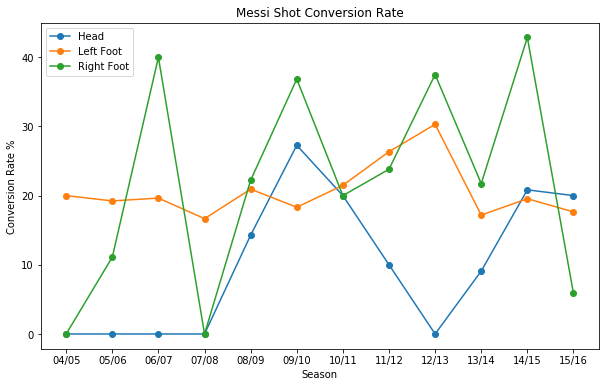

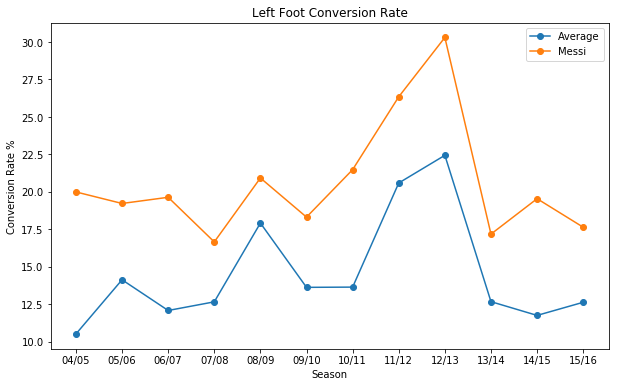

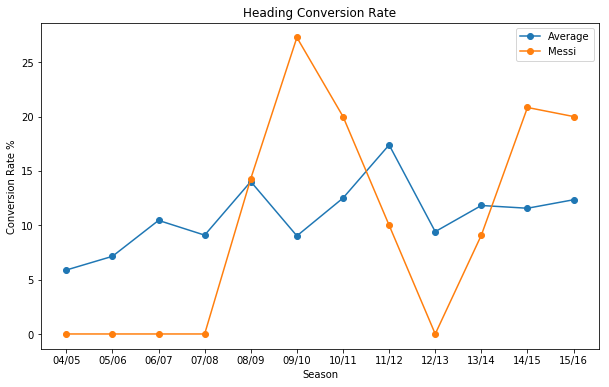

In [111]:
seasons = ['15/16','14/15','13/14','12/13','11/12','10/11','09/10','08/09','07/08','06/07','05/06','04/05']
ind = list(reversed(np.arange(len(seasons))))

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(ind, (np.array(m_h_g) / np.array(m_h)) * 100, '-o',label='Head')
ax.plot(ind, (np.array(m_lf_g) / np.array(m_lf)) * 100, '-o',label='Left Foot')
ax.plot(ind, np.nan_to_num((np.array(m_rf_g) / np.array(m_rf))) * 100, '-o',label='Right Foot')
ax.set(xticks=ind,xticklabels=seasons,xlabel='Season',ylabel='Conversion Rate %',title='Messi Shot Conversion Rate')
ax.legend(loc='best')

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(ind, (np.array(lf_g) / np.array(lf)) * 100, '-o',label='Average')
ax.plot(ind, (np.array(m_lf_g) / np.array(m_lf)) * 100, '-o',label='Messi')
ax.set(xticks=ind,xticklabels=seasons,xlabel='Season',ylabel='Conversion Rate %',title='Left Foot Conversion Rate')
ax.legend(loc='best')

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(ind, (np.array(h_g) / np.array(h)) * 100, '-o',label='Average')
ax.plot(ind, (np.array(m_h_g) / np.array(m_h)) * 100, '-o',label='Messi')
ax.set(xticks=ind,xticklabels=seasons,xlabel='Season',ylabel='Conversion Rate %',title='Heading Conversion Rate')
ax.legend(loc='best')

plt.show()

In [26]:
print(np.mean((np.array(h_g) / np.array(h)) * 100))
print(np.mean((np.array(m_h_g) / np.array(m_h)) * 100))

10.886390340275925
10.123556998557


## Passes

In [113]:
passes = {}
for year in years:
    passes[str(year)] = [get_pass(match) for match in event_data[str(year)]]

In [114]:
passes_seas = {}
for year in passes:
    passes_seas[str(year)] = pd.concat(passes[str(year)])
    passes_seas[str(year)].reset_index(inplace=True)

In [115]:
m_pass_seas = {}
m_pass_op_seas ={}
for year in years:
    m_pass_seas[str(year)] = passes_seas[str(year)][passes_seas[str(year)]['player'] == messi]
    m_pass_op_seas[str(year)] = passes_seas[str(year)][(passes_seas[str(year)]['player'] == messi)&
                                                       (passes_seas[str(year)]['pass_type'] == 'Standard')]

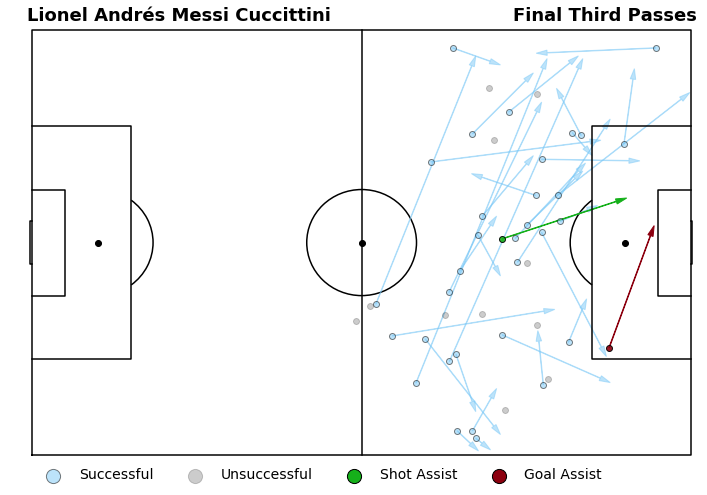

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22bc8be80>)

In [116]:
pass_map_player(event_data['2015'][3],messi,'third')

### Pass Quantity

In [117]:
m_pass_op_tot = [len(m_pass_op_seas[str(i)]) for i in years]
m_ft_pass_op_tot = [len(m_pass_op_seas[str(i)][m_pass_op_seas[str(i)]['end_x'] >= 80.]) for i in years]
m_box_pass_op_tot = [len(m_pass_op_seas[str(i)][(m_pass_op_seas[str(i)]['end_x'] >= 102.)&
                                                (m_pass_op_seas[str(i)]['end_y'] >= 18.)&
                                                (m_pass_op_seas[str(i)]['end_y'] <= 62.)]) for i in years]

In [118]:
m_pass_p90 = np.array(m_pass_op_tot) / np.array(m_90_played)
m_ft_pass_p90 = np.array(m_ft_pass_op_tot) / np.array(m_90_played)
m_box_pass_p90 = np.array(m_box_pass_op_tot) / np.array(m_90_played)

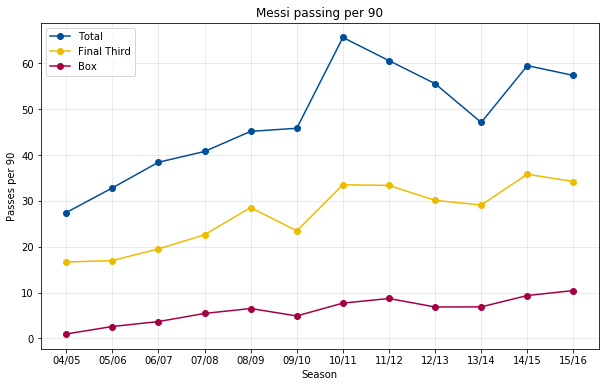

In [219]:
ind = np.flip(np.arange(len(years)))

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(ind,m_pass_p90,'-o',c='#004d98',label='Total')
ax.plot(ind,m_ft_pass_p90,'-o',c='#edbb00',label='Final Third')
ax.plot(ind,m_box_pass_p90,'-o',c='#a50044',label='Box')

ax.set(xticks=ind,xticklabels=seasons,xlabel='Season',ylabel='Passes per 90',title='Messi passing per 90')
ax.legend(loc=2)

ax.grid(True,alpha=0.3)

plt.show()

### What about types of passes?

In [120]:
m_thru_pass_op_tot = [len(m_pass_op_seas[str(i)][m_pass_op_seas[str(i)]['technique'] == 'Through Ball']) for i in years]
m_cross_pass_op_tot = [len(m_pass_op_seas[str(i)][m_pass_op_seas[str(i)]['cross'] == True]) for i in years]
m_switch_pass_op_tot = [len(m_pass_op_seas[str(i)][m_pass_op_seas[str(i)]['switch'] == True]) for i in years]

In [121]:
m_thru_p90 = np.array(m_thru_pass_op_tot) / np.array(m_90_played)
m_cross_p90 = np.array(m_cross_pass_op_tot) / np.array(m_90_played)
m_switch_p90 = np.array(m_switch_pass_op_tot) / np.array(m_90_played)

In [122]:
man_dates = [0,3+(5/12),7+(6/12),8+(7/12),9+(5/12)]
man_names = ['Rijkaard','Guardiola','Vilanova','Martino','Enrique']

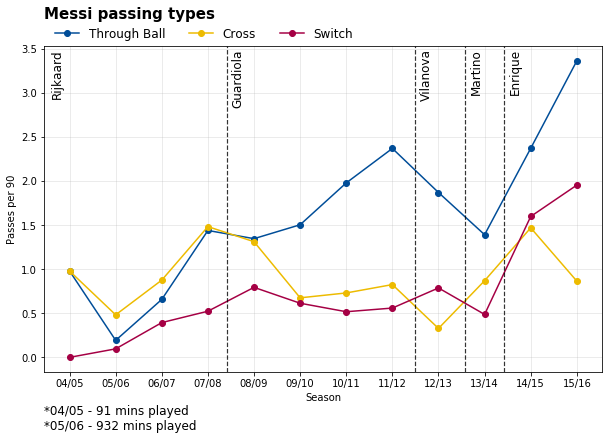

In [220]:
ind = np.flip(np.arange(len(years)))

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(ind,m_thru_p90,'-o',c='#004d98',label='Through Ball')
ax.plot(ind,m_cross_p90,'-o',c='#edbb00',label='Cross')
ax.plot(ind,m_switch_p90,'-o',c='#a50044',label='Switch')

for i in range(len(man_dates)-1):
    ax.axvline(man_dates[i+1],0,1,c='k',ls='--',lw=1.2,alpha=0.8)
    ax.text(man_dates[i+1]+0.1,3.5,man_names[i+1],fontsize=12,ha='left',va='top',rotation=90)
    
ax.text(man_dates[0]-0.4,3.5,man_names[0],fontsize=12,ha='left',va='top',rotation=90)
    
ax.set(xticks=ind,xticklabels=seasons,xlabel='Season',ylabel='Passes per 90')
ax.legend(loc=2,bbox_to_anchor=(0,1.09),ncol=3,frameon=False,fontsize=12)

ax.text(0.0,1.12,'Messi passing types',ha='left', va='top',transform=ax.transAxes,fontsize=15,fontweight='semibold')
ax.text(0.0, -0.1, '*04/05 - 91 mins played\n*05/06 - 932 mins played', ha='left', va='top', transform=ax.transAxes, fontsize=12)

ax.grid(True,alpha=0.3)

plt.show()
#fig.savefig('example_plots/messi_pass_type_p90.pdf',bbox_inches='tight')

In [185]:
m_pass_match = {}
for year in list(reversed(years)):
    m_pass_match[str(year)] = []
    for i in range(len(passes[str(year)])):
        m_pass_match[str(year)].append(passes[str(year)][i][(passes[str(year)][i]['player'] == messi)&
                                                     (passes[str(year)][i]['pass_type'] == 'Standard')])

In [186]:
m_pass_op_match = {}
for year in list(reversed(years)):
    m_pass_op_match[str(year)] = []
    for i in range(len(m_pass_match[str(year)])):
        m_pass_op_match[str(year)].append(len(m_pass_match[str(year)][i]))

In [212]:
m_pass_temp = [*m_pass_op_match.values()]
m_pass_all_df = pd.DataFrame([val for sublist in m_pass_temp for val in sublist])

In [214]:
roll_avg = m_pass_all_df.rolling(6).mean().values

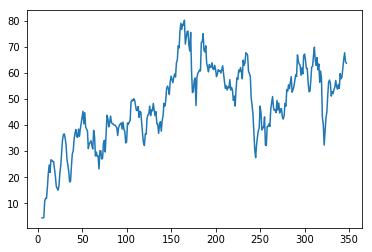

In [215]:
plt.plot(np.arange(len(roll_avg)),roll_avg)

## Carries and Dribbles

In [103]:
clean_event_data(event_data['2015'][0])

,m_index,event_id,period,minute,second,type,pos,pos_team,play_pattern,team,player,x,y,end_x,end_y,height,duration,pressure,outcome,recipient
0,1,e39d9e49-c259-4634-8adb-cfbf19db7976,1,0,0,Starting XI,1,Athletic Bilbao,Regular Play,Athletic Bilbao,None,NaN,NaN,NaN,NaN,None,0.000000,None,None,None
1,2,8704bfb6-4737-4e3e-b824-8f0a2d8638f4,1,0,0,Starting XI,1,Athletic Bilbao,Regular Play,Barcelona,None,NaN,NaN,NaN,NaN,None,0.000000,None,None,None
2,3,334441f5-8564-4bca-901b-211fb0931ea5,1,0,0,Half Start,1,Athletic Bilbao,Regular Play,Barcelona,None,NaN,NaN,NaN,NaN,None,0.000000,None,None,None
3,4,36727f1f-e43b-4f1c-81b8-fdadd644434c,1,0,0,Half Start,1,Athletic Bilbao,Regular Play,Athletic Bilbao,None,NaN,NaN,NaN,NaN,None,0.000000,None,None,None
4,5,4764514b-1272-4119-997f-b861b9a5edf1,1,0,0,Pass,2,Athletic Bilbao,From Kick Off,Athletic Bilbao,Mikel Rico Moreno,61.0,41.0,61.2,45.5,Ground Pass,0.351900,None,Complete,Javier Eraso Goñi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,3772,9dda5c25-10b3-4cc6-9246-d37345179ce9,2,93,59,Carry,177,Barcelona,From Throw In,Athletic Bilbao,Ibai Gómez Pérez,50.4,12.4,47.8,13.0,None,1.172500,None,None,None
3772,3773,bb0ee333-13a9-4f69-bdb8-2223db469d6f,2,94,0,Pass,177,Barcelona,From Throw In,Athletic Bilbao,Ibai Gómez Pérez,47.8,13.0,56.9,6.7,Ground Pass,0.732588,None,Complete,Markel Susaeta Laskurain
3773,3774,d85f79e4-e009-4a4a-a182-11accabc6a3b,2,94,1,Ball Receipt*,177,Barcelona,From Throw In,Athletic Bilbao,Markel Susaeta Laskurain,56.9,6.7,NaN,NaN,None,NaN,None,None,None
3774,3775,d1a2ae0d-fe26-4590-bb74-306a8955d192,2,94,4,Half End,177,Barcelona,From Throw In,Athletic Bilbao,None,NaN,NaN,NaN,NaN,None,0.000000,None,None,None


In [11]:
test = clean_event_data(event_data['2015'][0])

In [16]:
test[test['type'] == 'Pass'].outcome.unique()

array(['Complete', 'Incomplete', 'Out', 'Unknown', 'Injury Clearance',
       'Pass Offside'], dtype=object)

In [9]:
car = get_carry(event_data['2015'][0])
m_car = car[car['player'] == messi]
m_car_prog = m_car[((m_car['end_x'] - m_car['x']) * 0.914) >= 5.0]

In [73]:
m_car_prog

,index,event_id,period,minute,second,type,pos_team,play_pattern,team,player,x,y,duration,under_pressure,end_x,end_y,related_events
127,536,37c53a97-f9f3-49c0-87f6-6249150d7de6,1,10,11,Carry,Barcelona,From Throw In,Barcelona,Lionel Andrés Messi Cuccittini,65.3,76.2,3.030600,True,78.3,76.9,"[1a4077d8-0fad-4dd5-b3f4-a050460aab7e, 7fec797..."
164,715,473d2d75-44d1-43b8-b094-05db8af69722,1,13,39,Carry,Barcelona,From Free Kick,Barcelona,Lionel Andrés Messi Cuccittini,71.8,72.6,2.888700,True,91.1,54.6,"[20042eb1-76c5-4c2f-a184-f0322f9a6309, 55d5b37..."
353,1617,670bc318-e88a-427d-8098-f71516dff30d,1,41,24,Carry,Barcelona,From Keeper,Barcelona,Lionel Andrés Messi Cuccittini,85.0,59.0,1.820700,True,91.1,57.9,"[1f9c013c-4dd1-4072-8263-b104d7bbf9f9, 5956974..."
379,1752,fa9d1af2-12c6-45a0-948c-404fd9d74838,1,45,35,Carry,Barcelona,From Free Kick,Barcelona,Lionel Andrés Messi Cuccittini,68.4,55.0,2.507900,True,85.0,53.3,"[04e5757a-8ceb-426f-9ba1-416e5a690372, dd02d82..."
514,2404,495b6358-5122-49e5-aff4-4a38666ace16,2,58,15,Carry,Barcelona,Regular Play,Barcelona,Lionel Andrés Messi Cuccittini,64.9,41.0,1.770000,True,79.5,45.1,"[96e0275f-0002-4221-a169-1f3731363ea8, e2369da..."
529,2488,e3579975-5cd7-4062-b4c9-3f4a0cf4c216,2,59,27,Carry,Barcelona,From Free Kick,Barcelona,Lionel Andrés Messi Cuccittini,77.6,30.0,0.802500,True,87.4,27.9,"[380e6437-7114-4b71-9c14-ac8abb841620, 56068b9..."
688,3377,cb511911-43ee-4fb3-8ce4-3f4f0d74a302,2,84,35,Carry,Barcelona,From Counter,Barcelona,Lionel Andrés Messi Cuccittini,50.3,25.6,0.701178,True,56.9,27.0,"[1b762687-430a-4c18-adc9-3af1f06520a0, 45d5abc..."
689,3380,48329fc3-b492-45bb-acba-7d0fe5d2d93e,2,84,36,Carry,Barcelona,From Counter,Barcelona,Lionel Andrés Messi Cuccittini,56.9,27.0,1.516222,True,73.6,32.3,"[1b762687-430a-4c18-adc9-3af1f06520a0, 5e32e53..."
703,3455,409d7067-dcdb-41c5-bc58-f3d435f6f40d,2,86,32,Carry,Barcelona,From Throw In,Barcelona,Lionel Andrés Messi Cuccittini,64.9,55.6,1.875100,True,74.2,57.1,"[17a77941-f607-43b6-b2bb-f76a13f40bc8, 30b1ca3..."
704,3459,7f3e9bd3-96de-48a5-870a-dbbacff3268c,2,86,34,Carry,Barcelona,From Throw In,Barcelona,Lionel Andrés Messi Cuccittini,74.2,57.1,3.090100,True,89.3,53.3,"[0623b7e9-da5e-49a0-b6ee-cf40929e5c82, 3abcf74..."


In [160]:
print(event_data['2015'][0][535])
event_data['2015'][0][3471]

{'id': '37c53a97-f9f3-49c0-87f6-6249150d7de6', 'index': 536, 'period': 1, 'timestamp': '00:10:11.331', 'minute': 10, 'second': 11, 'type': {'id': 43, 'name': 'Carry'}, 'possession': 17, 'possession_team': {'id': 217, 'name': 'Barcelona'}, 'play_pattern': {'id': 4, 'name': 'From Throw In'}, 'team': {'id': 217, 'name': 'Barcelona'}, 'player': {'id': 5503, 'name': 'Lionel Andrés Messi Cuccittini'}, 'position': {'id': 17, 'name': 'Right Wing'}, 'location': [65.3, 76.2], 'duration': 3.0306, 'under_pressure': True, 'related_events': ['1a4077d8-0fad-4dd5-b3f4-a050460aab7e', '7fec797c-6f92-4da6-a4d0-728b10965247', '941e330f-ca01-4f54-ab2c-cbdb95bbf8d3'], 'carry': {'end_location': [78.3, 76.9]}}


{'id': '9e8157da-d157-4d41-8a1d-58bfb640bb12',
 'index': 3472,
 'period': 2,
 'timestamp': '00:41:40.858',
 'minute': 86,
 'second': 40,
 'type': {'id': 17, 'name': 'Pressure'},
 'possession': 161,
 'possession_team': {'id': 217, 'name': 'Barcelona'},
 'play_pattern': {'id': 4, 'name': 'From Throw In'},
 'team': {'id': 215, 'name': 'Athletic Bilbao'},
 'player': {'id': 6386, 'name': 'Eneko Bóveda Altube'},
 'position': {'id': 2, 'name': 'Right Back'},
 'location': [13.9, 47.2],
 'duration': 0.524642,
 'related_events': ['59d48c54-8269-43f6-91c2-97d7b53e107e',
  '68a4e987-50ef-42cc-9c7c-c1f6b11cd63f']}

In [135]:
event_df = clean_event_data(event_data['2015'][0])
car_outcome = []
pass_outcome = []
for index, row in m_car_prog.iterrows():
    for j in row['related_events']:
        event = event_df[event_df['event_id'] == j]
        if event['m_index'].values > row['index']:
            if event['type'].values == 'Dribble':
                if event['outcome'].values == 'Complete':
                    car_outcome.append('Successful')
                else:
                    car_outcome.append('Unsuccessful')
                pass_outcome.append(None)
                break
                    
            elif event['type'].values == 'Pass':
                if event['outcome'].values == 'Complete':
                    car_outcome.append('Successful')
                    pass_event = event_data['2015'][0][(event['m_index'].values-1)[0]]
                    if 'shot_assist' in pass_event['pass']:
                        pass_outcome.append('Shot Assist')
                    elif 'goal_assist' in pass_event['pass']:
                        pass_outcome.append('Goal Assist')
                    else:
                        pass_outcome.append('Complete')
                else:
                    car_outcome.append('Unsuccessful')
                    pass_outcome.append('Incomplete')
                break
                    
            elif event['type'].values == 'Shot':
                car_outcome.append('Successful')
                pass_outcome.append(None)
                break
                
            else:
                pass
                #car_outcome.append(event['type'].values)
                

In [120]:
'shot_assist' in event_data['2015'][0][1618]['pass']

True

In [133]:
car_outcome

['Unsuccessful',
 'Unsuccessful',
 'Successful',
 'Unsuccessful',
 'Successful',
 'Successful',
 'Successful',
 'Unsuccessful',
 'Successful',
 'Successful',
 'Successful',
 'Successful']

In [134]:
pass_outcome

[None,
 'Incomplete',
 'Shot Assist',
 'Incomplete',
 'Complete',
 'Complete',
 None,
 'Incomplete',
 None,
 None,
 None,
 None]

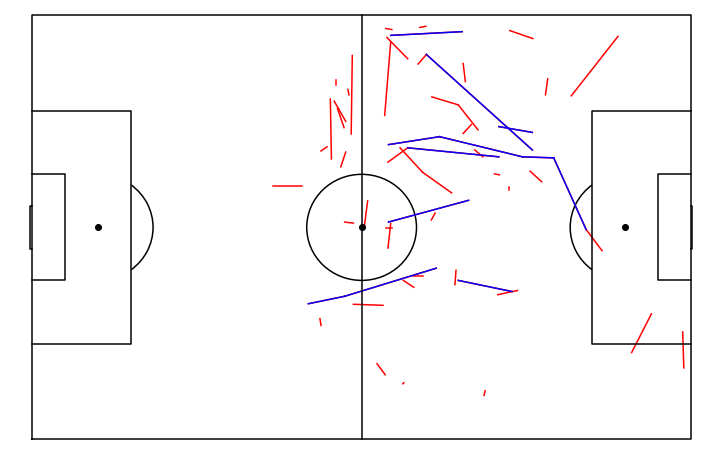

In [227]:
fig, ax = draw_pitch('w','k','h','f')

x = m_car['x'].values
y = m_car['y'].values
xe = m_car['end_x'].values
ye = m_car['end_y'].values

xp = m_car_prog['x'].values
yp = m_car_prog['y'].values
xep = m_car_prog['end_x'].values
yep = m_car_prog['end_y'].values

ax.plot([x,xe],[y,ye],'r')
ax.plot([xp,xep],[yp,yep],'b')
plt.show()